In [1]:
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
import os
from os import environ, path

current_directory = os.getcwd()
print(current_directory) 
df = pd.read_csv('data/historical_data.csv')


c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\DeliveryPredictionModel


In [59]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_time_taken'] = df['actual_delivery_time']-df['created_at']
df['date'] = pd.to_datetime(df['actual_delivery_time']).dt.date
df['actual_time_taken'] = df['actual_time_taken']/ pd.offsets.Second(1) ## Transforms it into seconds

In [61]:
cleaned  = df[df['actual_time_taken'] <= df.actual_time_taken.quantile(0.9999)] # removing the outliers
cleaned = cleaned.dropna(
    how='any', 
    subset=[
        'actual_time_taken', 
        'market_id', 
        'store_primary_category',
        'total_onshift_dashers',
        'total_busy_dashers',
        'total_outstanding_orders'
    ],
)

<Axes: ylabel='Frequency'>

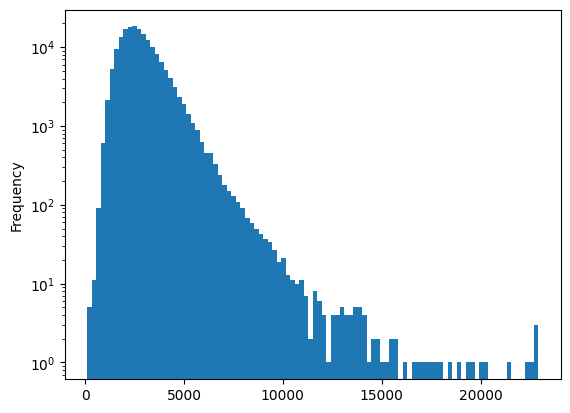

In [65]:
cleaned.actual_time_taken.plot.hist(bins=100, log=True)

In [68]:
integer_columns = [
    'market_id',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
]
for column in integer_columns:
    cleaned[column] = cleaned[column].astype('int32')

In [74]:
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

In [69]:
basic_features = extract_numerical_features(cleaned_data)
basic_features.head()

NameError: name 'extract_numerical_features' is not defined